In [1]:
import pandas as pd
import numpy as np
from urllib.request import urlopen
from PIL import Image
import timm
import torch
from tqdm import tqdm
import ast
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

/Users/veeranonthuvasin/Desktop/MSc-Data-Science-Bristol/Dissertation/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
real_world_data = pd.read_csv('../Data/Bristol-Corpus/Real-World-GrayScale-PSM3/real_world_df.csv')
real_world_data

,name,DayOfBirth,EducationalDegree,Gender,NativeCountry,NativeLanguage,OtherLanguage,Profession,WritingType,Science,WrittenLanguage,ascii_path,images_path,stroke_path
0,0,NaN,NaN,NaN,NaN,French,NaN,NaN,NaN,NaN,NaN,NaN,['./Data/Bristol-Corpus/Real-World-GrayScale-P...,NaN
1,1,NaN,NaN,NaN,NaN,German,NaN,NaN,NaN,NaN,NaN,NaN,['./Data/Bristol-Corpus/Real-World-GrayScale-P...,NaN
2,3,NaN,NaN,NaN,NaN,German,NaN,NaN,NaN,NaN,NaN,NaN,['./Data/Bristol-Corpus/Real-World-GrayScale-P...,NaN
3,4,NaN,NaN,NaN,NaN,French,NaN,NaN,NaN,NaN,NaN,NaN,['./Data/Bristol-Corpus/Real-World-GrayScale-P...,NaN
4,5,NaN,NaN,NaN,NaN,French,NaN,NaN,NaN,NaN,NaN,NaN,['./Data/Bristol-Corpus/Real-World-GrayScale-P...,NaN
5,6,NaN,NaN,NaN,NaN,German,NaN,NaN,NaN,NaN,NaN,NaN,['./Data/Bristol-Corpus/Real-World-GrayScale-P...,NaN


In [3]:
real_world_data['NativeLanguage'].value_counts()

NativeLanguage
French    3
German    3
Name: count, dtype: int64

# Utility Functions
- Feature Extraction Functions
- Change writer label

In [ ]:
def feature_extraction(writer_name, images_path):
  model = timm.create_model(
      'convnextv2_nano.fcmae_ft_in22k_in1k',
      pretrained=True,
      num_classes=0,  # remove classifier nn.Linear
  )
  model = model.eval()

  data_config = timm.data.resolve_model_data_config(model)
  transforms = timm.data.create_transform(**data_config, is_training=False)

  all_features_data = []
  writer_id_list = []
  writer_forms_list = []
  for name, i in tqdm(zip(writer_name,images_path)):
      i = ast.literal_eval(i)
      for j in i:
        j = j.replace('./', '../')
        image_list = glob.glob(j)
        for k in image_list:
          with Image.open(k) as img:
            img = img.convert('RGB')
            
            with torch.no_grad():
              output = model(transforms(img).unsqueeze(0))
            # print(output)
            # features = output.pooler_output.detach().numpy()
            # print(features)
            # last_hidden_states = outputs.last_hidden_state
            # print(last_hidden_states.shape)
            # features = last_hidden_states[:, 0, :]
            # print(features)
            # Store the results
            image_form = os.path.splitext(os.path.basename(k))[0]
            writer_forms_list.append(image_form)
            writer_id_list.append(name)
            all_features_data.append(output.detach().flatten().tolist())

              


  writer_features_df = pd.DataFrame(data=all_features_data)
  writer_features_df['name'] = writer_id_list
  writer_features_df['form'] = writer_forms_list
  return writer_features_df

def convert_y(y):
  if y == 'German':
    return 0
  if y == 'French': 
    return 1
  if y == 'English':
    return 2

# Feature Extraction Full

In [5]:
all_features = feature_extraction(real_world_data['name'], real_world_data['images_path'])
all_features

6it [00:17,  2.86s/it]


,0,1,2,3,4,5,6,7,8,9,...,632,633,634,635,636,637,638,639,name,form
0,0.900881,-1.535855,1.216326,0.263924,0.861893,0.184795,-1.468211,-0.903002,0.471242,-1.091495,...,0.058538,-1.304109,1.541442,-0.424794,-0.802706,1.041371,-0.328758,3.136823,0,page000_line003
1,1.134265,-1.362282,2.273987,0.284600,-0.652768,-0.222237,-0.832183,-1.145109,0.296855,-2.368747,...,0.157107,-1.092878,1.892547,-0.487107,0.093969,2.060857,-1.213497,2.975895,0,page000_line002
2,0.593472,-0.976235,0.744769,0.308163,-0.685127,-0.755348,-2.012943,0.673236,-0.896982,-1.988740,...,-0.753516,-0.608883,1.339883,0.432048,0.636367,1.714106,0.504608,1.266553,0,page000_line000
3,1.280957,-1.285501,1.829224,0.499230,-0.052572,0.709289,-1.074080,-1.166486,0.981797,-1.591591,...,0.361287,-0.495855,1.635529,-0.772384,1.012281,2.350589,-0.735705,2.450419,0,page000_line001
4,1.312774,-0.413435,2.063291,0.887190,0.801703,-0.023718,-2.104139,0.721972,0.649561,-2.637098,...,-0.471062,0.093955,0.671852,0.130571,-0.747895,2.493425,-1.339399,1.875247,0,page000_line005
5,-0.088423,-0.558079,2.144183,0.348551,-0.823501,-0.331861,-1.095646,0.077632,0.161654,-2.837906,...,-0.645933,-0.706350,0.919395,1.023801,-0.501715,1.016948,-1.168648,1.912641,0,page000_line004
6,1.352457,-1.241885,1.946865,0.645203,-0.915543,-0.268871,-1.386410,-0.908995,0.262660,-2.861198,...,0.164378,0.277399,2.058115,0.161064,0.208770,3.003321,-1.318584,2.281312,0,page000_line006
7,1.507467,-1.915475,2.334567,0.967679,0.755115,0.768464,-1.766531,-0.953910,0.261470,-2.457000,...,0.438582,-0.710739,1.944403,-0.137118,-0.349195,2.496340,-0.891258,2.711566,0,page000_line007
8,1.369867,-1.144850,2.374497,1.486444,0.057034,0.659323,-0.906150,-0.305979,-0.087208,-2.945641,...,0.621893,-1.044549,1.939120,0.076557,0.389761,1.469566,-0.691275,1.780019,0,page000_line008
9,-0.611749,-2.095418,0.496747,1.899151,-0.842998,0.447551,-1.261050,-2.167131,1.413064,-2.242526,...,0.244677,-0.928682,1.154003,-0.196702,-1.030584,1.451702,-0.573324,0.096913,1,page000_line003


# Feature Extraction for Training Set (class-wise fixed sizes and bootstrapping)
- 3/4 Sentence-Level Images per Sub-writer Profile, for 6 Sub-writer Profiles.

In [6]:
def create_sub_writers_bootstrap(train_df, feature_store, images_per_subwriter=4, num_profiles_per_writer=6, fold_seed=42):
    writer_names_in_fold = train_df['name'].unique()
    feature_df = feature_store[feature_store['name'].isin(writer_names_in_fold)]

    feature_columns = [col for col in feature_df.columns if col not in ['name', 'form']]
    aggregated_data = []
    
    unique_writers = feature_df['name'].unique()
    
    for writer_id in unique_writers:
        writer_df = feature_df[feature_df['name'] == writer_id]
        num_images = len(writer_df)
        
        if num_images == 0:
            continue

        if num_images <= images_per_subwriter:
            
            feature_chunk = writer_df[feature_columns]
            mean_features = feature_chunk.mean(axis=0)
            median_features = feature_chunk.median(axis=0)
            std_features = feature_chunk.std(axis=0).fillna(0)
            skew_features = feature_chunk.skew(axis=0).fillna(0)
            
            new_row = {}
            for col in feature_columns:
                new_row[f'{col}|mean'] = mean_features[col]
                new_row[f'{col}|median'] = median_features[col]
                new_row[f'{col}|std'] = std_features[col]
                new_row[f'{col}|skew'] = skew_features[col]
                
            
            new_row['original_writer_id'] = writer_id
            new_row['sub_writer_id'] = f"{writer_id}-agg-0"
            aggregated_data.append(new_row)
            continue

        writer_profiles = []
        
        max_attempts = num_profiles_per_writer * 5
        
        for i in range(max_attempts):
            sample_chunk = writer_df.sample(n=images_per_subwriter, replace=True, random_state=fold_seed + hash(writer_id) % 100000 + i)
            feature_chunk = sample_chunk[feature_columns]
            
            mean_features = feature_chunk.mean(axis=0)
            median_features = feature_chunk.median(axis=0)
            std_features = feature_chunk.std(axis=0).fillna(0)
            skew_features = feature_chunk.skew(axis=0).fillna(0)
            
            profile_dict = {}
            for col in feature_columns:
                profile_dict[f'{col}|mean'] = mean_features[col]
                profile_dict[f'{col}|median'] = median_features[col]
                profile_dict[f'{col}|std'] = std_features[col]
                profile_dict[f'{col}|skew'] = skew_features[col]
                
            writer_profiles.append(profile_dict)
            
            temp_df = pd.DataFrame(writer_profiles).drop_duplicates()
            if len(temp_df) >= num_profiles_per_writer:
                break
        
        if writer_profiles:
            profiles_df = pd.DataFrame(writer_profiles)
            unique_profiles_df = profiles_df.drop_duplicates().reset_index(drop=True)
            final_profiles_df = unique_profiles_df.head(num_profiles_per_writer)

            for i, row in final_profiles_df.iterrows():
                profile_data = row.to_dict()
                profile_data['original_writer_id'] = writer_id
                profile_data['sub_writer_id'] = f"{writer_id}-boot-{i}"
                aggregated_data.append(profile_data)
            
    
    final_df = pd.DataFrame(aggregated_data)
    
    new_feature_columns = []
    for col in feature_columns:
        new_feature_columns.append(f'{col}|mean')
        new_feature_columns.append(f'{col}|median')
        new_feature_columns.append(f'{col}|std')
        new_feature_columns.append(f'{col}|skew')

    cols = ['sub_writer_id', 'original_writer_id'] + new_feature_columns
    final_df = final_df[cols]
    
    final_df = pd.merge(final_df, train_df[['name', 'NativeLanguage']], how='inner', left_on='original_writer_id', right_on='name')
    
    X_train = final_df.drop(columns=['sub_writer_id', 'original_writer_id','name','NativeLanguage'])
    y_train = final_df['NativeLanguage']
    y_train = np.vectorize(convert_y)(y_train)
    
    return X_train, y_train


In [7]:
feature_store = pd.read_csv('./Final-Data/All-Writers-Feature-Vectors-GrayScale.csv', index_col=[0])
display(feature_store)
writers_info = pd.read_csv('./Final-Data/new-writers-info.csv')
english_writer_info = pd.read_csv('../Data/Bristol-Corpus/English-GrayScale/english_df.csv')
writers_info = pd.concat([writers_info, english_writer_info], axis=0, ignore_index=True)
writers_info = writers_info.loc[(writers_info['NativeLanguage'] != 'Swiss German')]
all_writers_info = feature_store[['name']].drop_duplicates().reset_index(drop=True)
all_writers_info = pd.merge(all_writers_info, writers_info[['name', 'NativeLanguage']], how='inner', on='name')
all_labels = all_writers_info['NativeLanguage']

,0,1,2,3,4,5,6,7,8,9,...,632,633,634,635,636,637,638,639,name,form
0,-0.372276,0.224989,-0.467460,1.820759,-0.586967,1.776678,-3.153311,-2.495186,0.968704,-1.006844,...,-0.981443,-0.273160,1.014988,1.218125,-0.981978,3.083691,-1.024849,2.180169,10000,z01-000-03
1,-0.033635,-0.905358,0.258783,1.923517,-0.866238,0.205671,-1.162825,-0.941368,1.491512,-0.259629,...,-0.438199,-1.047727,1.526454,-0.711613,-0.884340,0.576500,-1.261368,1.769279,10000,z01-000-02
2,0.025888,-0.592650,0.585571,2.040271,-0.155405,-0.120354,-1.829877,-1.252309,1.205214,-0.259600,...,-1.126850,-1.122187,0.977126,0.345049,-0.814934,0.962746,-0.548778,2.673030,10000,z01-000-01
3,-1.510987,-0.666809,-1.368710,1.987004,-0.221620,0.672618,-3.057467,-1.380301,1.458408,-1.007992,...,-1.292161,-1.257141,-0.041370,1.655186,-0.791135,2.099786,-1.133589,1.716038,10000,z01-000-05
4,-0.917990,-0.359039,0.085779,1.985653,-1.203340,0.940839,-2.236159,-2.180054,1.759380,-1.052856,...,-0.828048,-1.400792,1.134104,0.957654,-0.926594,2.193790,-1.190055,2.018496,10000,z01-000-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,-0.166905,-1.087335,0.436946,0.041008,-1.445201,0.030634,-0.942336,-1.672251,2.018108,0.040737,...,-1.728344,-0.209595,1.440409,0.387701,0.704579,0.775189,-1.445656,1.703038,25,page000_line001
2837,-1.020958,-0.973095,-0.202618,0.460286,-0.908080,0.431273,-1.310988,-2.186874,1.921045,-1.022282,...,-1.463473,-0.259575,0.989406,0.643102,0.046823,0.620898,-0.797454,2.097991,25,page000_line005
2838,0.187808,-0.616186,0.712529,1.516693,-1.776467,1.043272,-0.366190,-1.701217,1.274346,-1.977084,...,-0.142874,1.226076,0.536600,0.963856,0.226091,1.882359,-2.185912,1.138407,25,page000_line006
2839,-0.546677,-1.329427,-0.422880,1.233715,-1.006450,0.287910,-1.033419,-2.418210,1.775813,-1.206054,...,-1.083004,-0.112003,0.532118,0.783740,0.341568,0.286427,-0.865030,1.536021,25,page000_line009


## X_test

In [8]:
def create_writer_level_profile(test_df, feature_store):

  writer_names_in_fold = test_df['name'].unique()
  print(writer_names_in_fold)
  test_features_df = feature_store[feature_store['name'].isin(writer_names_in_fold)]
  
  writer_level_feature_df = test_features_df.groupby(['name'], as_index=False)[test_features_df.columns[:-2]].agg(['mean', 'median', 'std', 'skew']).fillna(0)
  writer_level_feature_df.columns = writer_level_feature_df.columns.map(lambda x: '|'.join(map(str, x)))
  
  final_test_df = pd.merge(writer_level_feature_df, test_df[['name', 'NativeLanguage']], how='inner', left_on='name|', right_on='name')
  
  X_test = final_test_df.drop(columns=['name','name|','NativeLanguage'])
  y_test = final_test_df['NativeLanguage']
  y_test = np.vectorize(convert_y)(y_test)
  
  return X_test, y_test
  
  


# Model

In [9]:
import pandas as pd
import numpy as np
import joblib
import optuna
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import f1_score
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# --- Configuration ---
N_TRIALS = 100  
VALIDATION_SET_SIZE = 0.2 

# ==============================================================================

def final_objective(trial, X_train_full, y_train_full):
    params = {
        'feature_selection__max_features': trial.suggest_int('feature_selection__max_features', 10, 1000),
        'classification__n_estimators': trial.suggest_int('classification__n_estimators', 50, 1000),
        'classification__learning_rate': trial.suggest_float('classification__learning_rate', 1e-3, 0.01, log=True),
        'classification__max_depth': trial.suggest_int('classification__max_depth', 3, 15),
        'classification__subsample': trial.suggest_float('classification__subsample', 0.6, 1.0),
        'classification__colsample_bytree': trial.suggest_float('classification__colsample_bytree', 0.6, 1.0),
        'classification__lambda': trial.suggest_float('classification__lambda', 0.1, 30.0, log=True),
        'classification__alpha': trial.suggest_float('classification__alpha', 0.1, 20.0, log=True),
        'classification__min_child_weight': trial.suggest_int('classification__min_child_weight', 1, 10)
    }

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('feature_selection', SelectFromModel(RandomForestClassifier(random_state=42))),
        ('classification', XGBClassifier(random_state=42, eval_metric='mlogloss')) 
    ])
    pipeline.set_params(**params)

    sss = StratifiedShuffleSplit(n_splits=1, test_size=VALIDATION_SET_SIZE, random_state=42)
    train_idx, val_idx = next(sss.split(X_train_full, y_train_full))

    X_train, X_val = X_train_full.iloc[train_idx], X_train_full.iloc[val_idx]
    y_train, y_val = y_train_full[train_idx], y_train_full[val_idx]

    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_val)
    score = f1_score(y_val, predictions, average='macro')

    return score


if __name__ == '__main__':
    X_train_full, y_train_full = create_sub_writers_bootstrap(
        train_df=all_writers_info,
        feature_store=feature_store,
        images_per_subwriter=4,
        fold_seed=42 
    )
    print(f"Augmented training set created with {len(X_train_full)} samples.")

    print(f"\nStarting Optuna hyperparameter search for {N_TRIALS} trials...")
    study = optuna.create_study(direction='maximize')
    
    objective_with_data = lambda trial: final_objective(trial, X_train_full, y_train_full)
    
    study.optimize(objective_with_data, n_trials=N_TRIALS, show_progress_bar=True)

    final_best_params = study.best_params
    print("\n--- Optuna Search Complete ---")
    print(f"Best validation F1-score: {study.best_value}")
    print("\n--- Final Best Hyperparameters for Production Model ---")
    print(final_best_params)
    

[I 2025-08-30 02:19:54,930] A new study created in memory with name: no-name-db838380-1444-4320-977f-9e7c79536846


Augmented training set created with 342 samples.

Starting Optuna hyperparameter search for 100 trials...


Best trial: 0. Best value: 0.835582:   1%|          | 1/100 [00:05<09:27,  5.73s/it]

[I 2025-08-30 02:20:00,663] Trial 0 finished with value: 0.8355819233868015 and parameters: {'feature_selection__max_features': 852, 'classification__n_estimators': 312, 'classification__learning_rate': 0.0011458831312373397, 'classification__max_depth': 3, 'classification__subsample': 0.8729355511782803, 'classification__colsample_bytree': 0.9654733928816991, 'classification__lambda': 2.016518655846322, 'classification__alpha': 4.628107463630652, 'classification__min_child_weight': 8}. Best is trial 0 with value: 0.8355819233868015.


Best trial: 1. Best value: 0.849394:   2%|▏         | 2/100 [00:11<09:33,  5.85s/it]

[I 2025-08-30 02:20:06,602] Trial 1 finished with value: 0.8493935989398785 and parameters: {'feature_selection__max_features': 945, 'classification__n_estimators': 236, 'classification__learning_rate': 0.001166701653573398, 'classification__max_depth': 9, 'classification__subsample': 0.9849435629343285, 'classification__colsample_bytree': 0.6624165964672706, 'classification__lambda': 1.0042465856375498, 'classification__alpha': 0.16180479257103458, 'classification__min_child_weight': 6}. Best is trial 1 with value: 0.8493935989398785.


Best trial: 1. Best value: 0.849394:   3%|▎         | 3/100 [00:14<06:57,  4.30s/it]

[I 2025-08-30 02:20:09,058] Trial 2 finished with value: 0.7865613797817188 and parameters: {'feature_selection__max_features': 16, 'classification__n_estimators': 650, 'classification__learning_rate': 0.0019863447066253742, 'classification__max_depth': 11, 'classification__subsample': 0.6863467660030075, 'classification__colsample_bytree': 0.7524342306715951, 'classification__lambda': 18.737371748813043, 'classification__alpha': 0.11036834861869346, 'classification__min_child_weight': 1}. Best is trial 1 with value: 0.8493935989398785.


Best trial: 3. Best value: 0.880406:   4%|▍         | 4/100 [00:17<06:17,  3.93s/it]

[I 2025-08-30 02:20:12,421] Trial 3 finished with value: 0.8804061435640383 and parameters: {'feature_selection__max_features': 652, 'classification__n_estimators': 106, 'classification__learning_rate': 0.009006522492857764, 'classification__max_depth': 10, 'classification__subsample': 0.9534074854108616, 'classification__colsample_bytree': 0.8955394500812728, 'classification__lambda': 0.6966269568188569, 'classification__alpha': 8.488396142030425, 'classification__min_child_weight': 4}. Best is trial 3 with value: 0.8804061435640383.


Best trial: 3. Best value: 0.880406:   5%|▌         | 5/100 [00:26<09:03,  5.72s/it]

[I 2025-08-30 02:20:21,309] Trial 4 finished with value: 0.8333659696989476 and parameters: {'feature_selection__max_features': 687, 'classification__n_estimators': 396, 'classification__learning_rate': 0.004437523713150149, 'classification__max_depth': 11, 'classification__subsample': 0.9156738052239445, 'classification__colsample_bytree': 0.9601386627589964, 'classification__lambda': 0.3983235404389969, 'classification__alpha': 0.2449641100974264, 'classification__min_child_weight': 9}. Best is trial 3 with value: 0.8804061435640383.


Best trial: 3. Best value: 0.880406:   6%|▌         | 6/100 [00:39<13:06,  8.37s/it]

[I 2025-08-30 02:20:34,816] Trial 5 finished with value: 0.8661367319230937 and parameters: {'feature_selection__max_features': 497, 'classification__n_estimators': 821, 'classification__learning_rate': 0.002010423012213232, 'classification__max_depth': 4, 'classification__subsample': 0.9468279605651455, 'classification__colsample_bytree': 0.6045116993794709, 'classification__lambda': 0.4033564198268641, 'classification__alpha': 1.0937877157751683, 'classification__min_child_weight': 4}. Best is trial 3 with value: 0.8804061435640383.


Best trial: 3. Best value: 0.880406:   7%|▋         | 7/100 [00:48<13:14,  8.54s/it]

[I 2025-08-30 02:20:43,724] Trial 6 finished with value: 0.8333659696989476 and parameters: {'feature_selection__max_features': 681, 'classification__n_estimators': 433, 'classification__learning_rate': 0.0037077506194832404, 'classification__max_depth': 12, 'classification__subsample': 0.9034808549569937, 'classification__colsample_bytree': 0.7415220662819872, 'classification__lambda': 12.04961450673184, 'classification__alpha': 0.27700794806763945, 'classification__min_child_weight': 8}. Best is trial 3 with value: 0.8804061435640383.


Best trial: 3. Best value: 0.880406:   8%|▊         | 8/100 [00:52<10:42,  6.98s/it]

[I 2025-08-30 02:20:47,371] Trial 7 finished with value: 0.8638650890792873 and parameters: {'feature_selection__max_features': 896, 'classification__n_estimators': 192, 'classification__learning_rate': 0.009112021818006343, 'classification__max_depth': 6, 'classification__subsample': 0.6240684887807985, 'classification__colsample_bytree': 0.844169278102954, 'classification__lambda': 1.960612905116954, 'classification__alpha': 1.3050476188412212, 'classification__min_child_weight': 10}. Best is trial 3 with value: 0.8804061435640383.


Best trial: 3. Best value: 0.880406:   9%|▉         | 9/100 [00:55<08:42,  5.74s/it]

[I 2025-08-30 02:20:50,385] Trial 8 finished with value: 0.8481906124247743 and parameters: {'feature_selection__max_features': 143, 'classification__n_estimators': 377, 'classification__learning_rate': 0.004974576536035103, 'classification__max_depth': 10, 'classification__subsample': 0.8167168986711639, 'classification__colsample_bytree': 0.8475417019904288, 'classification__lambda': 10.576519490280266, 'classification__alpha': 6.100531284373446, 'classification__min_child_weight': 5}. Best is trial 3 with value: 0.8804061435640383.


Best trial: 9. Best value: 0.896686:  10%|█         | 10/100 [01:08<11:52,  7.92s/it]

[I 2025-08-30 02:21:03,176] Trial 9 finished with value: 0.8966861598440546 and parameters: {'feature_selection__max_features': 540, 'classification__n_estimators': 923, 'classification__learning_rate': 0.0025379468840938985, 'classification__max_depth': 8, 'classification__subsample': 0.6656903571409114, 'classification__colsample_bytree': 0.7425450129315556, 'classification__lambda': 3.1486062101263026, 'classification__alpha': 0.420599598504815, 'classification__min_child_weight': 10}. Best is trial 9 with value: 0.8966861598440546.


Best trial: 9. Best value: 0.896686:  11%|█         | 11/100 [01:31<18:43, 12.62s/it]

[I 2025-08-30 02:21:26,457] Trial 10 finished with value: 0.8817125064117848 and parameters: {'feature_selection__max_features': 357, 'classification__n_estimators': 990, 'classification__learning_rate': 0.0021469332913163853, 'classification__max_depth': 14, 'classification__subsample': 0.719897199835535, 'classification__colsample_bytree': 0.6968269236158928, 'classification__lambda': 0.11949555226044213, 'classification__alpha': 0.8086918277451611, 'classification__min_child_weight': 1}. Best is trial 9 with value: 0.8966861598440546.


Best trial: 9. Best value: 0.896686:  12%|█▏        | 12/100 [01:53<22:52, 15.59s/it]

[I 2025-08-30 02:21:48,842] Trial 11 finished with value: 0.8817125064117848 and parameters: {'feature_selection__max_features': 333, 'classification__n_estimators': 972, 'classification__learning_rate': 0.002189281116714064, 'classification__max_depth': 15, 'classification__subsample': 0.7201613568083168, 'classification__colsample_bytree': 0.6959938966269206, 'classification__lambda': 0.10052956630871676, 'classification__alpha': 0.5970182632740371, 'classification__min_child_weight': 1}. Best is trial 9 with value: 0.8966861598440546.


Best trial: 9. Best value: 0.896686:  13%|█▎        | 13/100 [02:10<23:15, 16.04s/it]

[I 2025-08-30 02:22:05,908] Trial 12 finished with value: 0.8817125064117848 and parameters: {'feature_selection__max_features': 342, 'classification__n_estimators': 977, 'classification__learning_rate': 0.00269211736231555, 'classification__max_depth': 7, 'classification__subsample': 0.7154356961068431, 'classification__colsample_bytree': 0.7721092135646448, 'classification__lambda': 4.748216088750303, 'classification__alpha': 0.5472269497585609, 'classification__min_child_weight': 3}. Best is trial 9 with value: 0.8966861598440546.


Best trial: 13. Best value: 0.896913:  14%|█▍        | 14/100 [02:18<19:27, 13.57s/it]

[I 2025-08-30 02:22:13,783] Trial 13 finished with value: 0.8969128246974023 and parameters: {'feature_selection__max_features': 389, 'classification__n_estimators': 707, 'classification__learning_rate': 0.002964299538561056, 'classification__max_depth': 15, 'classification__subsample': 0.6008311504826784, 'classification__colsample_bytree': 0.687582002074241, 'classification__lambda': 0.11133559321582051, 'classification__alpha': 2.6272515412603163, 'classification__min_child_weight': 7}. Best is trial 13 with value: 0.8969128246974023.


Best trial: 13. Best value: 0.896913:  15%|█▌        | 15/100 [02:25<16:21, 11.55s/it]

[I 2025-08-30 02:22:20,646] Trial 14 finished with value: 0.8318497392907557 and parameters: {'feature_selection__max_features': 512, 'classification__n_estimators': 711, 'classification__learning_rate': 0.00570500074320415, 'classification__max_depth': 7, 'classification__subsample': 0.6025863435809103, 'classification__colsample_bytree': 0.622930628436617, 'classification__lambda': 3.2418061019572266, 'classification__alpha': 18.745594270639437, 'classification__min_child_weight': 7}. Best is trial 13 with value: 0.8969128246974023.


Best trial: 13. Best value: 0.896913:  16%|█▌        | 16/100 [02:35<15:24, 11.01s/it]

[I 2025-08-30 02:22:30,401] Trial 15 finished with value: 0.8969128246974023 and parameters: {'feature_selection__max_features': 490, 'classification__n_estimators': 795, 'classification__learning_rate': 0.0030152909739547045, 'classification__max_depth': 8, 'classification__subsample': 0.6528036618637006, 'classification__colsample_bytree': 0.8197352838451871, 'classification__lambda': 4.50608369642987, 'classification__alpha': 2.6061554579293222, 'classification__min_child_weight': 10}. Best is trial 13 with value: 0.8969128246974023.


Best trial: 13. Best value: 0.896913:  17%|█▋        | 17/100 [02:40<12:35,  9.10s/it]

[I 2025-08-30 02:22:35,066] Trial 16 finished with value: 0.8481906124247743 and parameters: {'feature_selection__max_features': 219, 'classification__n_estimators': 590, 'classification__learning_rate': 0.003407894176000691, 'classification__max_depth': 13, 'classification__subsample': 0.7798050357023875, 'classification__colsample_bytree': 0.8183218678994293, 'classification__lambda': 6.592288422478148, 'classification__alpha': 2.771266918606883, 'classification__min_child_weight': 7}. Best is trial 13 with value: 0.8969128246974023.


Best trial: 13. Best value: 0.896913:  18%|█▊        | 18/100 [02:50<13:00,  9.52s/it]

[I 2025-08-30 02:22:45,554] Trial 17 finished with value: 0.8804061435640383 and parameters: {'feature_selection__max_features': 454, 'classification__n_estimators': 804, 'classification__learning_rate': 0.0014513752273978306, 'classification__max_depth': 5, 'classification__subsample': 0.646680558490103, 'classification__colsample_bytree': 0.9078076891584782, 'classification__lambda': 0.21037605322410094, 'classification__alpha': 2.4176732854640757, 'classification__min_child_weight': 9}. Best is trial 13 with value: 0.8969128246974023.


Best trial: 13. Best value: 0.896913:  19%|█▉        | 19/100 [02:56<11:19,  8.38s/it]

[I 2025-08-30 02:22:51,296] Trial 18 finished with value: 0.8802606434185382 and parameters: {'feature_selection__max_features': 245, 'classification__n_estimators': 515, 'classification__learning_rate': 0.006897316662326304, 'classification__max_depth': 15, 'classification__subsample': 0.7664904311236891, 'classification__colsample_bytree': 0.7974160445854115, 'classification__lambda': 0.9082655413794732, 'classification__alpha': 2.203279086981557, 'classification__min_child_weight': 6}. Best is trial 13 with value: 0.8969128246974023.


Best trial: 13. Best value: 0.896913:  20%|██        | 20/100 [03:08<12:43,  9.55s/it]

[I 2025-08-30 02:23:03,550] Trial 19 finished with value: 0.8638650890792873 and parameters: {'feature_selection__max_features': 796, 'classification__n_estimators': 769, 'classification__learning_rate': 0.0014879091638177926, 'classification__max_depth': 13, 'classification__subsample': 0.607230421996074, 'classification__colsample_bytree': 0.6992316204959881, 'classification__lambda': 29.83211565018962, 'classification__alpha': 13.219013746475204, 'classification__min_child_weight': 8}. Best is trial 13 with value: 0.8969128246974023.


Best trial: 13. Best value: 0.896913:  21%|██        | 21/100 [03:22<14:23, 10.93s/it]

[I 2025-08-30 02:23:17,688] Trial 20 finished with value: 0.8802606434185382 and parameters: {'feature_selection__max_features': 607, 'classification__n_estimators': 878, 'classification__learning_rate': 0.00405901372365251, 'classification__max_depth': 8, 'classification__subsample': 0.8328694706218455, 'classification__colsample_bytree': 0.8884172560865086, 'classification__lambda': 0.2869809868829398, 'classification__alpha': 3.9739627200095895, 'classification__min_child_weight': 10}. Best is trial 13 with value: 0.8969128246974023.


Best trial: 13. Best value: 0.896913:  22%|██▏       | 22/100 [03:31<13:27, 10.36s/it]

[I 2025-08-30 02:23:26,723] Trial 21 finished with value: 0.8969128246974023 and parameters: {'feature_selection__max_features': 435, 'classification__n_estimators': 880, 'classification__learning_rate': 0.0026756334025371635, 'classification__max_depth': 8, 'classification__subsample': 0.6626499164543843, 'classification__colsample_bytree': 0.7284945415718735, 'classification__lambda': 3.5534793529123325, 'classification__alpha': 1.651436397281431, 'classification__min_child_weight': 10}. Best is trial 13 with value: 0.8969128246974023.


Best trial: 13. Best value: 0.896913:  23%|██▎       | 23/100 [03:38<11:47,  9.19s/it]

[I 2025-08-30 02:23:33,190] Trial 22 finished with value: 0.8802606434185382 and parameters: {'feature_selection__max_features': 417, 'classification__n_estimators': 677, 'classification__learning_rate': 0.0031849486371116464, 'classification__max_depth': 9, 'classification__subsample': 0.6519969237602138, 'classification__colsample_bytree': 0.6530563767746224, 'classification__lambda': 6.294501222091664, 'classification__alpha': 1.711078500921907, 'classification__min_child_weight': 9}. Best is trial 13 with value: 0.8969128246974023.


Best trial: 13. Best value: 0.896913:  24%|██▍       | 24/100 [03:50<12:51, 10.15s/it]

[I 2025-08-30 02:23:45,575] Trial 23 finished with value: 0.8638650890792873 and parameters: {'feature_selection__max_features': 588, 'classification__n_estimators': 865, 'classification__learning_rate': 0.0026633875433455176, 'classification__max_depth': 6, 'classification__subsample': 0.6910008615014398, 'classification__colsample_bytree': 0.7816973860252203, 'classification__lambda': 1.4090752734321612, 'classification__alpha': 3.5764327046528814, 'classification__min_child_weight': 10}. Best is trial 13 with value: 0.8969128246974023.


Best trial: 13. Best value: 0.896913:  25%|██▌       | 25/100 [03:57<11:37,  9.30s/it]

[I 2025-08-30 02:23:52,910] Trial 24 finished with value: 0.8804061435640383 and parameters: {'feature_selection__max_features': 257, 'classification__n_estimators': 741, 'classification__learning_rate': 0.0028511871124928386, 'classification__max_depth': 8, 'classification__subsample': 0.7493013587273256, 'classification__colsample_bytree': 0.7088817229145956, 'classification__lambda': 3.791276861860396, 'classification__alpha': 1.6195581326654962, 'classification__min_child_weight': 7}. Best is trial 13 with value: 0.8969128246974023.


Best trial: 13. Best value: 0.896913:  26%|██▌       | 26/100 [04:04<10:20,  8.38s/it]

[I 2025-08-30 02:23:59,129] Trial 25 finished with value: 0.8804061435640383 and parameters: {'feature_selection__max_features': 423, 'classification__n_estimators': 569, 'classification__learning_rate': 0.0015289004242457268, 'classification__max_depth': 10, 'classification__subsample': 0.642842679883533, 'classification__colsample_bytree': 0.6632133003186635, 'classification__lambda': 10.328892845834032, 'classification__alpha': 7.2912325384046515, 'classification__min_child_weight': 9}. Best is trial 13 with value: 0.8969128246974023.


Best trial: 13. Best value: 0.896913:  27%|██▋       | 27/100 [04:17<11:51,  9.74s/it]

[I 2025-08-30 02:24:12,053] Trial 26 finished with value: 0.8638650890792873 and parameters: {'feature_selection__max_features': 767, 'classification__n_estimators': 645, 'classification__learning_rate': 0.003275010511983655, 'classification__max_depth': 6, 'classification__subsample': 0.6767226150860873, 'classification__colsample_bytree': 0.8262601499741494, 'classification__lambda': 2.4360160847997867, 'classification__alpha': 0.9647543318235792, 'classification__min_child_weight': 8}. Best is trial 13 with value: 0.8969128246974023.


Best trial: 13. Best value: 0.896913:  28%|██▊       | 28/100 [04:21<09:43,  8.11s/it]

[I 2025-08-30 02:24:16,354] Trial 27 finished with value: 0.8781043517885623 and parameters: {'feature_selection__max_features': 126, 'classification__n_estimators': 872, 'classification__learning_rate': 0.0051949467477691875, 'classification__max_depth': 7, 'classification__subsample': 0.6280709675209359, 'classification__colsample_bytree': 0.748712064154569, 'classification__lambda': 1.336097126466459, 'classification__alpha': 1.9233375788654772, 'classification__min_child_weight': 9}. Best is trial 13 with value: 0.8969128246974023.


Best trial: 28. Best value: 0.91179:  29%|██▉       | 29/100 [04:33<11:03,  9.34s/it] 

[I 2025-08-30 02:24:28,563] Trial 28 finished with value: 0.91178976062697 and parameters: {'feature_selection__max_features': 395, 'classification__n_estimators': 775, 'classification__learning_rate': 0.00401922894304209, 'classification__max_depth': 11, 'classification__subsample': 0.6952662913482198, 'classification__colsample_bytree': 0.7193605514760858, 'classification__lambda': 6.351663967363323, 'classification__alpha': 3.5358651161326615, 'classification__min_child_weight': 5}. Best is trial 28 with value: 0.91178976062697.


Best trial: 28. Best value: 0.91179:  30%|███       | 30/100 [04:43<11:00,  9.44s/it]

[I 2025-08-30 02:24:38,230] Trial 29 finished with value: 0.8481906124247743 and parameters: {'feature_selection__max_features': 315, 'classification__n_estimators': 765, 'classification__learning_rate': 0.004137838161052336, 'classification__max_depth': 13, 'classification__subsample': 0.7412386067565334, 'classification__colsample_bytree': 0.9928758978757156, 'classification__lambda': 6.067823838759666, 'classification__alpha': 4.694552149519725, 'classification__min_child_weight': 5}. Best is trial 28 with value: 0.91178976062697.


Best trial: 28. Best value: 0.91179:  31%|███       | 31/100 [04:49<09:46,  8.50s/it]

[I 2025-08-30 02:24:44,534] Trial 30 finished with value: 0.8474391105970053 and parameters: {'feature_selection__max_features': 185, 'classification__n_estimators': 501, 'classification__learning_rate': 0.006472586624572672, 'classification__max_depth': 12, 'classification__subsample': 0.8478807227013911, 'classification__colsample_bytree': 0.8707698172466091, 'classification__lambda': 16.118543308329894, 'classification__alpha': 11.28228612951167, 'classification__min_child_weight': 3}. Best is trial 28 with value: 0.91178976062697.


Best trial: 28. Best value: 0.91179:  32%|███▏      | 32/100 [04:58<09:45,  8.61s/it]

[I 2025-08-30 02:24:53,404] Trial 31 finished with value: 0.8804061435640383 and parameters: {'feature_selection__max_features': 425, 'classification__n_estimators': 818, 'classification__learning_rate': 0.0024031354611009047, 'classification__max_depth': 3, 'classification__subsample': 0.7001633931309227, 'classification__colsample_bytree': 0.7248036776916988, 'classification__lambda': 2.525009574520679, 'classification__alpha': 3.629534201072595, 'classification__min_child_weight': 6}. Best is trial 28 with value: 0.91178976062697.


Best trial: 28. Best value: 0.91179:  33%|███▎      | 33/100 [05:15<12:22, 11.09s/it]

[I 2025-08-30 02:25:10,276] Trial 32 finished with value: 0.8792935792935793 and parameters: {'feature_selection__max_features': 565, 'classification__n_estimators': 912, 'classification__learning_rate': 0.002973108707530996, 'classification__max_depth': 9, 'classification__subsample': 0.6011226109399452, 'classification__colsample_bytree': 0.6630031185254265, 'classification__lambda': 4.520157193609762, 'classification__alpha': 5.326336137119816, 'classification__min_child_weight': 5}. Best is trial 28 with value: 0.91178976062697.


Best trial: 28. Best value: 0.91179:  34%|███▍      | 34/100 [05:28<12:55, 11.75s/it]

[I 2025-08-30 02:25:23,557] Trial 33 finished with value: 0.8652666148128944 and parameters: {'feature_selection__max_features': 464, 'classification__n_estimators': 685, 'classification__learning_rate': 0.001802066634571583, 'classification__max_depth': 9, 'classification__subsample': 0.6650200178450877, 'classification__colsample_bytree': 0.7805175973915408, 'classification__lambda': 7.857623775684581, 'classification__alpha': 2.7852133765304545, 'classification__min_child_weight': 4}. Best is trial 28 with value: 0.91178976062697.


Best trial: 28. Best value: 0.91179:  35%|███▌      | 35/100 [05:36<11:20, 10.46s/it]

[I 2025-08-30 02:25:31,016] Trial 34 finished with value: 0.8802606434185382 and parameters: {'feature_selection__max_features': 386, 'classification__n_estimators': 622, 'classification__learning_rate': 0.003697692977104419, 'classification__max_depth': 11, 'classification__subsample': 0.6304447571538656, 'classification__colsample_bytree': 0.6391575718878683, 'classification__lambda': 0.7308029726630045, 'classification__alpha': 1.3278809690499471, 'classification__min_child_weight': 8}. Best is trial 28 with value: 0.91178976062697.


Best trial: 28. Best value: 0.91179:  36%|███▌      | 36/100 [05:46<11:04, 10.39s/it]

[I 2025-08-30 02:25:41,235] Trial 35 finished with value: 0.847091110249005 and parameters: {'feature_selection__max_features': 274, 'classification__n_estimators': 732, 'classification__learning_rate': 0.004654514162136569, 'classification__max_depth': 14, 'classification__subsample': 0.6905919659868428, 'classification__colsample_bytree': 0.6791360523407458, 'classification__lambda': 4.810028569688741, 'classification__alpha': 3.3697638508501906, 'classification__min_child_weight': 6}. Best is trial 28 with value: 0.91178976062697.


Best trial: 28. Best value: 0.91179:  37%|███▋      | 37/100 [06:04<13:23, 12.76s/it]

[I 2025-08-30 02:25:59,539] Trial 36 finished with value: 0.8952380952380953 and parameters: {'feature_selection__max_features': 490, 'classification__n_estimators': 805, 'classification__learning_rate': 0.00185820921204577, 'classification__max_depth': 8, 'classification__subsample': 0.668882841892033, 'classification__colsample_bytree': 0.7227194135929418, 'classification__lambda': 1.5365743604607902, 'classification__alpha': 8.060906878386572, 'classification__min_child_weight': 3}. Best is trial 28 with value: 0.91178976062697.


Best trial: 28. Best value: 0.91179:  38%|███▊      | 38/100 [06:25<15:33, 15.06s/it]

[I 2025-08-30 02:26:19,949] Trial 37 finished with value: 0.8802606434185382 and parameters: {'feature_selection__max_features': 996, 'classification__n_estimators': 925, 'classification__learning_rate': 0.0035993187580767093, 'classification__max_depth': 11, 'classification__subsample': 0.630106490450429, 'classification__colsample_bytree': 0.7666550819378738, 'classification__lambda': 0.531286996401663, 'classification__alpha': 2.0058081725024164, 'classification__min_child_weight': 7}. Best is trial 28 with value: 0.91178976062697.


Best trial: 28. Best value: 0.91179:  39%|███▉      | 39/100 [06:28<11:49, 11.63s/it]

[I 2025-08-30 02:26:23,589] Trial 38 finished with value: 0.8481906124247743 and parameters: {'feature_selection__max_features': 56, 'classification__n_estimators': 850, 'classification__learning_rate': 0.001154849611157281, 'classification__max_depth': 10, 'classification__subsample': 0.7381354383441577, 'classification__colsample_bytree': 0.8113687194129668, 'classification__lambda': 14.567009581424077, 'classification__alpha': 0.7722516746704499, 'classification__min_child_weight': 10}. Best is trial 28 with value: 0.91178976062697.


Best trial: 28. Best value: 0.91179:  40%|████      | 40/100 [06:46<13:22, 13.38s/it]

[I 2025-08-30 02:26:41,049] Trial 39 finished with value: 0.8638650890792873 and parameters: {'feature_selection__max_features': 649, 'classification__n_estimators': 577, 'classification__learning_rate': 0.002351389207759003, 'classification__max_depth': 12, 'classification__subsample': 0.6534804375921152, 'classification__colsample_bytree': 0.9190567952642499, 'classification__lambda': 21.132276344628043, 'classification__alpha': 0.10322862967571123, 'classification__min_child_weight': 4}. Best is trial 28 with value: 0.91178976062697.


Best trial: 28. Best value: 0.91179:  41%|████      | 41/100 [07:00<13:25, 13.65s/it]

[I 2025-08-30 02:26:55,318] Trial 40 finished with value: 0.8638650890792873 and parameters: {'feature_selection__max_features': 291, 'classification__n_estimators': 774, 'classification__learning_rate': 0.004135494419052138, 'classification__max_depth': 10, 'classification__subsample': 0.7103044761969719, 'classification__colsample_bytree': 0.7301938326700387, 'classification__lambda': 8.699689794947359, 'classification__alpha': 1.1864378118807863, 'classification__min_child_weight': 2}. Best is trial 28 with value: 0.91178976062697.


Best trial: 28. Best value: 0.91179:  42%|████▏     | 42/100 [07:14<13:21, 13.82s/it]

[I 2025-08-30 02:27:09,531] Trial 41 finished with value: 0.8969128246974023 and parameters: {'feature_selection__max_features': 510, 'classification__n_estimators': 931, 'classification__learning_rate': 0.0024700773937021783, 'classification__max_depth': 8, 'classification__subsample': 0.6760906040392138, 'classification__colsample_bytree': 0.7476528620839865, 'classification__lambda': 3.1611096284475524, 'classification__alpha': 0.19004853081133843, 'classification__min_child_weight': 10}. Best is trial 28 with value: 0.91178976062697.


Best trial: 28. Best value: 0.91179:  43%|████▎     | 43/100 [07:28<13:09, 13.85s/it]

[I 2025-08-30 02:27:23,464] Trial 42 finished with value: 0.8966861598440546 and parameters: {'feature_selection__max_features': 522, 'classification__n_estimators': 933, 'classification__learning_rate': 0.00286619818731405, 'classification__max_depth': 7, 'classification__subsample': 0.678696648080516, 'classification__colsample_bytree': 0.7585286554097248, 'classification__lambda': 2.564545596591122, 'classification__alpha': 0.17600011002139482, 'classification__min_child_weight': 10}. Best is trial 28 with value: 0.91178976062697.


Best trial: 43. Best value: 0.91343:  44%|████▍     | 44/100 [07:38<11:51, 12.71s/it]

[I 2025-08-30 02:27:33,507] Trial 43 finished with value: 0.9134301765880712 and parameters: {'feature_selection__max_features': 396, 'classification__n_estimators': 826, 'classification__learning_rate': 0.003050520176067708, 'classification__max_depth': 5, 'classification__subsample': 0.6186272156342054, 'classification__colsample_bytree': 0.7934754900372663, 'classification__lambda': 3.262422217867939, 'classification__alpha': 0.3223021165552474, 'classification__min_child_weight': 9}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  45%|████▌     | 45/100 [07:42<09:18, 10.16s/it]

[I 2025-08-30 02:27:37,720] Trial 44 finished with value: 0.8638650890792873 and parameters: {'feature_selection__max_features': 371, 'classification__n_estimators': 262, 'classification__learning_rate': 0.003337034729350917, 'classification__max_depth': 4, 'classification__subsample': 0.6194454649284004, 'classification__colsample_bytree': 0.8474038507187974, 'classification__lambda': 2.1008034728516662, 'classification__alpha': 0.3192860085494674, 'classification__min_child_weight': 9}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  46%|████▌     | 46/100 [07:52<09:03, 10.06s/it]

[I 2025-08-30 02:27:47,555] Trial 45 finished with value: 0.8638650890792873 and parameters: {'feature_selection__max_features': 391, 'classification__n_estimators': 830, 'classification__learning_rate': 0.0030665267111436843, 'classification__max_depth': 5, 'classification__subsample': 0.6163933578519958, 'classification__colsample_bytree': 0.7963041952554138, 'classification__lambda': 1.0122923677805016, 'classification__alpha': 5.432168757029556, 'classification__min_child_weight': 9}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  47%|████▋     | 47/100 [08:01<08:35,  9.72s/it]

[I 2025-08-30 02:27:56,459] Trial 46 finished with value: 0.8802606434185382 and parameters: {'feature_selection__max_features': 473, 'classification__n_estimators': 695, 'classification__learning_rate': 0.003783635463778459, 'classification__max_depth': 5, 'classification__subsample': 0.6397542089844437, 'classification__colsample_bytree': 0.679019941582859, 'classification__lambda': 4.708367763104875, 'classification__alpha': 2.708984883161488, 'classification__min_child_weight': 8}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  48%|████▊     | 48/100 [08:10<08:18,  9.58s/it]

[I 2025-08-30 02:28:05,730] Trial 47 finished with value: 0.8158788328279853 and parameters: {'feature_selection__max_features': 312, 'classification__n_estimators': 890, 'classification__learning_rate': 0.002169434731217347, 'classification__max_depth': 3, 'classification__subsample': 0.9897272210557941, 'classification__colsample_bytree': 0.8289043927820645, 'classification__lambda': 3.7789212396954945, 'classification__alpha': 0.9365466194731309, 'classification__min_child_weight': 9}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  49%|████▉     | 49/100 [08:21<08:33, 10.06s/it]

[I 2025-08-30 02:28:16,911] Trial 48 finished with value: 0.8817125064117848 and parameters: {'feature_selection__max_features': 353, 'classification__n_estimators': 725, 'classification__learning_rate': 0.00267619277745132, 'classification__max_depth': 14, 'classification__subsample': 0.6570751893042887, 'classification__colsample_bytree': 0.8660257948520693, 'classification__lambda': 0.15190599454808215, 'classification__alpha': 0.5826607287054075, 'classification__min_child_weight': 5}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  50%|█████     | 50/100 [08:24<06:30,  7.82s/it]

[I 2025-08-30 02:28:19,503] Trial 49 finished with value: 0.8487776124445595 and parameters: {'feature_selection__max_features': 628, 'classification__n_estimators': 73, 'classification__learning_rate': 0.004453893037138067, 'classification__max_depth': 11, 'classification__subsample': 0.8994495816926549, 'classification__colsample_bytree': 0.7178101145130811, 'classification__lambda': 7.883221316403771, 'classification__alpha': 0.4087953970305683, 'classification__min_child_weight': 6}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  51%|█████     | 51/100 [08:33<06:41,  8.20s/it]

[I 2025-08-30 02:28:28,592] Trial 50 finished with value: 0.8633528265107212 and parameters: {'feature_selection__max_features': 721, 'classification__n_estimators': 459, 'classification__learning_rate': 0.005416358683460615, 'classification__max_depth': 15, 'classification__subsample': 0.7845474411242199, 'classification__colsample_bytree': 0.618427278261625, 'classification__lambda': 1.8590645061985946, 'classification__alpha': 3.0303240015370307, 'classification__min_child_weight': 8}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  52%|█████▏    | 52/100 [08:46<07:34,  9.46s/it]

[I 2025-08-30 02:28:40,993] Trial 51 finished with value: 0.8633528265107212 and parameters: {'feature_selection__max_features': 557, 'classification__n_estimators': 950, 'classification__learning_rate': 0.0024495345739278815, 'classification__max_depth': 9, 'classification__subsample': 0.636923464172569, 'classification__colsample_bytree': 0.6832809653742722, 'classification__lambda': 3.2429174140492143, 'classification__alpha': 0.14915212328168057, 'classification__min_child_weight': 10}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  53%|█████▎    | 53/100 [08:58<08:09, 10.41s/it]

[I 2025-08-30 02:28:53,634] Trial 52 finished with value: 0.8969128246974023 and parameters: {'feature_selection__max_features': 453, 'classification__n_estimators': 991, 'classification__learning_rate': 0.002048150155324929, 'classification__max_depth': 8, 'classification__subsample': 0.6975744456043096, 'classification__colsample_bytree': 0.738330030420407, 'classification__lambda': 5.593122172217202, 'classification__alpha': 0.19711940196391148, 'classification__min_child_weight': 10}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  54%|█████▍    | 54/100 [09:11<08:29, 11.08s/it]

[I 2025-08-30 02:29:06,257] Trial 53 finished with value: 0.8802606434185382 and parameters: {'feature_selection__max_features': 538, 'classification__n_estimators': 783, 'classification__learning_rate': 0.002294188972387718, 'classification__max_depth': 7, 'classification__subsample': 0.6162190868813048, 'classification__colsample_bytree': 0.7947001987572306, 'classification__lambda': 3.0552653921760706, 'classification__alpha': 0.1326245874292284, 'classification__min_child_weight': 10}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  55%|█████▌    | 55/100 [09:24<08:46, 11.71s/it]

[I 2025-08-30 02:29:19,421] Trial 54 finished with value: 0.8969128246974023 and parameters: {'feature_selection__max_features': 498, 'classification__n_estimators': 901, 'classification__learning_rate': 0.0017059520067751967, 'classification__max_depth': 6, 'classification__subsample': 0.6748526363733272, 'classification__colsample_bytree': 0.7649385601878154, 'classification__lambda': 3.4739972713220837, 'classification__alpha': 0.2398949063432325, 'classification__min_child_weight': 10}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  56%|█████▌    | 56/100 [09:34<08:14, 11.24s/it]

[I 2025-08-30 02:29:29,594] Trial 55 finished with value: 0.8969128246974023 and parameters: {'feature_selection__max_features': 415, 'classification__n_estimators': 843, 'classification__learning_rate': 0.002618042064740913, 'classification__max_depth': 8, 'classification__subsample': 0.7221208315718235, 'classification__colsample_bytree': 0.7052686311444942, 'classification__lambda': 4.123348150928312, 'classification__alpha': 1.5596814350980186, 'classification__min_child_weight': 9}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  57%|█████▋    | 57/100 [09:44<07:42, 10.75s/it]

[I 2025-08-30 02:29:39,203] Trial 56 finished with value: 0.898177174039243 and parameters: {'feature_selection__max_features': 441, 'classification__n_estimators': 792, 'classification__learning_rate': 0.0034804870295616457, 'classification__max_depth': 4, 'classification__subsample': 0.6585125001205603, 'classification__colsample_bytree': 0.7444803412435206, 'classification__lambda': 1.152313168569403, 'classification__alpha': 0.33376148165362834, 'classification__min_child_weight': 9}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  58%|█████▊    | 58/100 [09:56<07:49, 11.17s/it]

[I 2025-08-30 02:29:51,349] Trial 57 finished with value: 0.8497698667190193 and parameters: {'feature_selection__max_features': 435, 'classification__n_estimators': 650, 'classification__learning_rate': 0.0034989662245481796, 'classification__max_depth': 4, 'classification__subsample': 0.9593304581469422, 'classification__colsample_bytree': 0.809040179595727, 'classification__lambda': 0.32696701197362915, 'classification__alpha': 0.4347007052016737, 'classification__min_child_weight': 7}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  59%|█████▉    | 59/100 [10:05<07:09, 10.47s/it]

[I 2025-08-30 02:30:00,192] Trial 58 finished with value: 0.8802606434185382 and parameters: {'feature_selection__max_features': 350, 'classification__n_estimators': 741, 'classification__learning_rate': 0.003933013576391759, 'classification__max_depth': 4, 'classification__subsample': 0.6511810847611833, 'classification__colsample_bytree': 0.7822630701447371, 'classification__lambda': 1.1530913055724041, 'classification__alpha': 4.218280427123801, 'classification__min_child_weight': 8}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  60%|██████    | 60/100 [10:14<06:47, 10.19s/it]

[I 2025-08-30 02:30:09,710] Trial 59 finished with value: 0.8802606434185382 and parameters: {'feature_selection__max_features': 400, 'classification__n_estimators': 793, 'classification__learning_rate': 0.0031282375596168505, 'classification__max_depth': 5, 'classification__subsample': 0.6050971605732489, 'classification__colsample_bytree': 0.7370843613846245, 'classification__lambda': 10.900005432201631, 'classification__alpha': 0.7244070605492977, 'classification__min_child_weight': 9}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  61%|██████    | 61/100 [10:26<06:51, 10.54s/it]

[I 2025-08-30 02:30:21,077] Trial 60 finished with value: 0.8802606434185382 and parameters: {'feature_selection__max_features': 596, 'classification__n_estimators': 607, 'classification__learning_rate': 0.004781449704436727, 'classification__max_depth': 6, 'classification__subsample': 0.6615975701418042, 'classification__colsample_bytree': 0.6838646858490137, 'classification__lambda': 0.5029133210525534, 'classification__alpha': 2.4047310234985635, 'classification__min_child_weight': 7}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  62%|██████▏   | 62/100 [10:38<07:06, 11.21s/it]

[I 2025-08-30 02:30:33,856] Trial 61 finished with value: 0.9134301765880712 and parameters: {'feature_selection__max_features': 497, 'classification__n_estimators': 959, 'classification__learning_rate': 0.0028579934157133423, 'classification__max_depth': 7, 'classification__subsample': 0.6847078679483505, 'classification__colsample_bytree': 0.7489325438000831, 'classification__lambda': 2.701312646285296, 'classification__alpha': 0.3237820287487846, 'classification__min_child_weight': 10}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  63%|██████▎   | 63/100 [10:51<07:08, 11.57s/it]

[I 2025-08-30 02:30:46,259] Trial 62 finished with value: 0.9134301765880712 and parameters: {'feature_selection__max_features': 459, 'classification__n_estimators': 968, 'classification__learning_rate': 0.00285652358387951, 'classification__max_depth': 7, 'classification__subsample': 0.7044343596989254, 'classification__colsample_bytree': 0.7148290476918823, 'classification__lambda': 0.211194422467877, 'classification__alpha': 0.2870288604931385, 'classification__min_child_weight': 9}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  64%|██████▍   | 64/100 [11:06<07:36, 12.68s/it]

[I 2025-08-30 02:31:01,513] Trial 63 finished with value: 0.9134301765880712 and parameters: {'feature_selection__max_features': 493, 'classification__n_estimators': 956, 'classification__learning_rate': 0.0029044954838025328, 'classification__max_depth': 7, 'classification__subsample': 0.710668957489906, 'classification__colsample_bytree': 0.7166123376722005, 'classification__lambda': 0.16181715923904547, 'classification__alpha': 0.30597200341781355, 'classification__min_child_weight': 9}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  65%|██████▌   | 65/100 [11:20<07:40, 13.16s/it]

[I 2025-08-30 02:31:15,803] Trial 64 finished with value: 0.8969128246974023 and parameters: {'feature_selection__max_features': 460, 'classification__n_estimators': 996, 'classification__learning_rate': 0.002936519814209154, 'classification__max_depth': 6, 'classification__subsample': 0.7687865700183834, 'classification__colsample_bytree': 0.7108865363267245, 'classification__lambda': 0.191561313226797, 'classification__alpha': 0.3146944844657309, 'classification__min_child_weight': 9}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  66%|██████▌   | 66/100 [11:32<07:16, 12.83s/it]

[I 2025-08-30 02:31:27,866] Trial 65 finished with value: 0.8804061435640383 and parameters: {'feature_selection__max_features': 323, 'classification__n_estimators': 952, 'classification__learning_rate': 0.003397621062900879, 'classification__max_depth': 5, 'classification__subsample': 0.7268205099029932, 'classification__colsample_bytree': 0.753261741555923, 'classification__lambda': 0.11197839557837075, 'classification__alpha': 0.23067068772080235, 'classification__min_child_weight': 8}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  67%|██████▋   | 67/100 [11:43<06:38, 12.08s/it]

[I 2025-08-30 02:31:38,197] Trial 66 finished with value: 0.8969128246974023 and parameters: {'feature_selection__max_features': 381, 'classification__n_estimators': 966, 'classification__learning_rate': 0.0028146164339356537, 'classification__max_depth': 3, 'classification__subsample': 0.7111163980041378, 'classification__colsample_bytree': 0.698670731338057, 'classification__lambda': 0.1497813840374051, 'classification__alpha': 0.37063658622375606, 'classification__min_child_weight': 9}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  68%|██████▊   | 68/100 [11:50<05:41, 10.66s/it]

[I 2025-08-30 02:31:45,540] Trial 67 finished with value: 0.8804061435640383 and parameters: {'feature_selection__max_features': 222, 'classification__n_estimators': 853, 'classification__learning_rate': 0.004275806785621101, 'classification__max_depth': 7, 'classification__subsample': 0.7554367782409555, 'classification__colsample_bytree': 0.6491331341835602, 'classification__lambda': 0.21304612213942042, 'classification__alpha': 0.5103495016879311, 'classification__min_child_weight': 9}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  69%|██████▉   | 69/100 [12:08<06:40, 12.91s/it]

[I 2025-08-30 02:32:03,716] Trial 68 finished with value: 0.8661367319230937 and parameters: {'feature_selection__max_features': 480, 'classification__n_estimators': 897, 'classification__learning_rate': 0.003255133045766197, 'classification__max_depth': 5, 'classification__subsample': 0.6897852216958031, 'classification__colsample_bytree': 0.6947595918559936, 'classification__lambda': 0.27868472442201986, 'classification__alpha': 0.2745309834032209, 'classification__min_child_weight': 5}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  70%|███████   | 70/100 [12:23<06:44, 13.48s/it]

[I 2025-08-30 02:32:18,523] Trial 69 finished with value: 0.8802606434185382 and parameters: {'feature_selection__max_features': 579, 'classification__n_estimators': 827, 'classification__learning_rate': 0.003729912121711444, 'classification__max_depth': 4, 'classification__subsample': 0.6976972171669596, 'classification__colsample_bytree': 0.7142333653880477, 'classification__lambda': 0.1302267542028042, 'classification__alpha': 0.4942919211510524, 'classification__min_child_weight': 8}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  71%|███████   | 71/100 [12:45<07:42, 15.93s/it]

[I 2025-08-30 02:32:40,181] Trial 70 finished with value: 0.8817125064117848 and parameters: {'feature_selection__max_features': 537, 'classification__n_estimators': 757, 'classification__learning_rate': 0.0031151766861265496, 'classification__max_depth': 6, 'classification__subsample': 0.736051199149735, 'classification__colsample_bytree': 0.7783187601543917, 'classification__lambda': 0.1789478621808354, 'classification__alpha': 0.31099765083904646, 'classification__min_child_weight': 4}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  72%|███████▏  | 72/100 [12:57<06:58, 14.96s/it]

[I 2025-08-30 02:32:52,861] Trial 71 finished with value: 0.9134301765880712 and parameters: {'feature_selection__max_features': 438, 'classification__n_estimators': 866, 'classification__learning_rate': 0.0028206764214767166, 'classification__max_depth': 7, 'classification__subsample': 0.6402318930337925, 'classification__colsample_bytree': 0.8339231642949809, 'classification__lambda': 0.2389216926719633, 'classification__alpha': 0.21948227100325157, 'classification__min_child_weight': 10}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  73%|███████▎  | 73/100 [13:11<06:28, 14.39s/it]

[I 2025-08-30 02:33:05,935] Trial 72 finished with value: 0.9134301765880712 and parameters: {'feature_selection__max_features': 434, 'classification__n_estimators': 866, 'classification__learning_rate': 0.002787419006501043, 'classification__max_depth': 7, 'classification__subsample': 0.6433997262925532, 'classification__colsample_bytree': 0.83919746219425, 'classification__lambda': 0.26445913947949307, 'classification__alpha': 0.12699683379736057, 'classification__min_child_weight': 10}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  74%|███████▍  | 74/100 [13:27<06:32, 15.09s/it]

[I 2025-08-30 02:33:22,651] Trial 73 finished with value: 0.9134301765880712 and parameters: {'feature_selection__max_features': 448, 'classification__n_estimators': 963, 'classification__learning_rate': 0.0028079993559580667, 'classification__max_depth': 7, 'classification__subsample': 0.7075952203469311, 'classification__colsample_bytree': 0.8618432817112214, 'classification__lambda': 0.24398201998678593, 'classification__alpha': 0.13273540562778469, 'classification__min_child_weight': 10}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  75%|███████▌  | 75/100 [13:36<05:30, 13.23s/it]

[I 2025-08-30 02:33:31,548] Trial 74 finished with value: 0.8469987228607918 and parameters: {'feature_selection__max_features': 406, 'classification__n_estimators': 960, 'classification__learning_rate': 0.009951752819460508, 'classification__max_depth': 7, 'classification__subsample': 0.7122077628301536, 'classification__colsample_bytree': 0.8632854012161579, 'classification__lambda': 0.24559605389073416, 'classification__alpha': 0.12985685147724232, 'classification__min_child_weight': 10}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  76%|███████▌  | 76/100 [13:52<05:39, 14.15s/it]

[I 2025-08-30 02:33:47,828] Trial 75 finished with value: 0.9134301765880712 and parameters: {'feature_selection__max_features': 514, 'classification__n_estimators': 906, 'classification__learning_rate': 0.0027270728131334227, 'classification__max_depth': 6, 'classification__subsample': 0.6837556283033474, 'classification__colsample_bytree': 0.9027682476040537, 'classification__lambda': 0.3850896931952597, 'classification__alpha': 0.11772810818989668, 'classification__min_child_weight': 10}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  77%|███████▋  | 77/100 [14:10<05:49, 15.18s/it]

[I 2025-08-30 02:34:05,426] Trial 76 finished with value: 0.9134301765880712 and parameters: {'feature_selection__max_features': 518, 'classification__n_estimators': 915, 'classification__learning_rate': 0.0025677523366448305, 'classification__max_depth': 7, 'classification__subsample': 0.6833738478401306, 'classification__colsample_bytree': 0.9176705774466115, 'classification__lambda': 0.3809648410801976, 'classification__alpha': 0.12698863540510505, 'classification__min_child_weight': 10}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  78%|███████▊  | 78/100 [14:32<06:17, 17.17s/it]

[I 2025-08-30 02:34:27,234] Trial 77 finished with value: 0.8966861598440546 and parameters: {'feature_selection__max_features': 622, 'classification__n_estimators': 1000, 'classification__learning_rate': 0.002282364747077922, 'classification__max_depth': 6, 'classification__subsample': 0.6319620631953055, 'classification__colsample_bytree': 0.8853574566252291, 'classification__lambda': 0.2501849767616327, 'classification__alpha': 0.20717602661095227, 'classification__min_child_weight': 10}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  79%|███████▉  | 79/100 [14:54<06:33, 18.75s/it]

[I 2025-08-30 02:34:49,655] Trial 78 finished with value: 0.8966861598440546 and parameters: {'feature_selection__max_features': 568, 'classification__n_estimators': 873, 'classification__learning_rate': 0.00282080537573438, 'classification__max_depth': 7, 'classification__subsample': 0.6446164676627316, 'classification__colsample_bytree': 0.9502311953196652, 'classification__lambda': 0.4809093552756564, 'classification__alpha': 0.11422922276146887, 'classification__min_child_weight': 10}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  80%|████████  | 80/100 [15:03<05:12, 15.62s/it]

[I 2025-08-30 02:34:57,983] Trial 79 finished with value: 0.8638650890792873 and parameters: {'feature_selection__max_features': 489, 'classification__n_estimators': 344, 'classification__learning_rate': 0.0021128034403392277, 'classification__max_depth': 7, 'classification__subsample': 0.7305510576261917, 'classification__colsample_bytree': 0.8338737799546801, 'classification__lambda': 0.3784388398590589, 'classification__alpha': 0.14300158274231214, 'classification__min_child_weight': 10}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  81%|████████  | 81/100 [15:25<05:38, 17.81s/it]

[I 2025-08-30 02:35:20,887] Trial 80 finished with value: 0.8802606434185382 and parameters: {'feature_selection__max_features': 677, 'classification__n_estimators': 936, 'classification__learning_rate': 0.002765031106364147, 'classification__max_depth': 6, 'classification__subsample': 0.709145320184872, 'classification__colsample_bytree': 0.8548520964713051, 'classification__lambda': 0.31115983526028496, 'classification__alpha': 0.1643536998148405, 'classification__min_child_weight': 10}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  82%|████████▏ | 82/100 [15:44<05:21, 17.88s/it]

[I 2025-08-30 02:35:38,951] Trial 81 finished with value: 0.8652666148128944 and parameters: {'feature_selection__max_features': 458, 'classification__n_estimators': 912, 'classification__learning_rate': 0.0025394060118077047, 'classification__max_depth': 7, 'classification__subsample': 0.807776970460397, 'classification__colsample_bytree': 0.9221409423215418, 'classification__lambda': 0.373257101376489, 'classification__alpha': 0.11603159920865681, 'classification__min_child_weight': 10}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  83%|████████▎ | 83/100 [16:01<05:01, 17.74s/it]

[I 2025-08-30 02:35:56,348] Trial 82 finished with value: 0.8966861598440546 and parameters: {'feature_selection__max_features': 518, 'classification__n_estimators': 957, 'classification__learning_rate': 0.002558593887881617, 'classification__max_depth': 8, 'classification__subsample': 0.6846218852391182, 'classification__colsample_bytree': 0.9016592731763557, 'classification__lambda': 0.16534989662133495, 'classification__alpha': 0.2564907428590224, 'classification__min_child_weight': 10}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  84%|████████▍ | 84/100 [16:19<04:46, 17.93s/it]

[I 2025-08-30 02:36:14,745] Trial 83 finished with value: 0.8969128246974023 and parameters: {'feature_selection__max_features': 520, 'classification__n_estimators': 910, 'classification__learning_rate': 0.0019824584935153287, 'classification__max_depth': 6, 'classification__subsample': 0.6693229495111995, 'classification__colsample_bytree': 0.9419769965001027, 'classification__lambda': 0.22625224795142462, 'classification__alpha': 0.2167895186894871, 'classification__min_child_weight': 9}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  85%|████████▌ | 85/100 [16:36<04:24, 17.64s/it]

[I 2025-08-30 02:36:31,701] Trial 84 finished with value: 0.8966861598440546 and parameters: {'feature_selection__max_features': 545, 'classification__n_estimators': 974, 'classification__learning_rate': 0.003000330528405661, 'classification__max_depth': 7, 'classification__subsample': 0.6839301235434989, 'classification__colsample_bytree': 0.8794974797401167, 'classification__lambda': 0.5971645804957, 'classification__alpha': 0.1703347306171338, 'classification__min_child_weight': 10}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  86%|████████▌ | 86/100 [16:52<04:00, 17.19s/it]

[I 2025-08-30 02:36:47,841] Trial 85 finished with value: 0.898177174039243 and parameters: {'feature_selection__max_features': 428, 'classification__n_estimators': 885, 'classification__learning_rate': 0.002241920056573177, 'classification__max_depth': 7, 'classification__subsample': 0.7030213591333527, 'classification__colsample_bytree': 0.8395822769081888, 'classification__lambda': 0.13226043212567068, 'classification__alpha': 0.10275425241433568, 'classification__min_child_weight': 9}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  87%|████████▋ | 87/100 [17:07<03:32, 16.34s/it]

[I 2025-08-30 02:37:02,179] Trial 86 finished with value: 0.8966861598440546 and parameters: {'feature_selection__max_features': 367, 'classification__n_estimators': 939, 'classification__learning_rate': 0.00243578966008259, 'classification__max_depth': 8, 'classification__subsample': 0.6246433842026835, 'classification__colsample_bytree': 0.9325736741470276, 'classification__lambda': 0.4424784994514212, 'classification__alpha': 0.15106215833071499, 'classification__min_child_weight': 10}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  88%|████████▊ | 88/100 [17:25<03:23, 16.93s/it]

[I 2025-08-30 02:37:20,506] Trial 87 finished with value: 0.898177174039243 and parameters: {'feature_selection__max_features': 475, 'classification__n_estimators': 859, 'classification__learning_rate': 0.002672851434064322, 'classification__max_depth': 9, 'classification__subsample': 0.6693588557229431, 'classification__colsample_bytree': 0.9745402641605214, 'classification__lambda': 0.1957049555065488, 'classification__alpha': 0.13277855218188858, 'classification__min_child_weight': 9}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  89%|████████▉ | 89/100 [17:41<03:03, 16.67s/it]

[I 2025-08-30 02:37:36,567] Trial 88 finished with value: 0.8969128246974023 and parameters: {'feature_selection__max_features': 497, 'classification__n_estimators': 971, 'classification__learning_rate': 0.00324631569356059, 'classification__max_depth': 6, 'classification__subsample': 0.7552868926483522, 'classification__colsample_bytree': 0.9089878970715431, 'classification__lambda': 0.26582784781055363, 'classification__alpha': 0.11973885478344405, 'classification__min_child_weight': 10}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  90%|█████████ | 90/100 [17:58<02:45, 16.59s/it]

[I 2025-08-30 02:37:52,953] Trial 89 finished with value: 0.9134301765880712 and parameters: {'feature_selection__max_features': 445, 'classification__n_estimators': 924, 'classification__learning_rate': 0.0029682619726881234, 'classification__max_depth': 5, 'classification__subsample': 0.6400747684944427, 'classification__colsample_bytree': 0.857037322043027, 'classification__lambda': 0.3094635634890357, 'classification__alpha': 0.1772305894249813, 'classification__min_child_weight': 9}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  91%|█████████ | 91/100 [18:12<02:23, 15.98s/it]

[I 2025-08-30 02:38:07,537] Trial 90 finished with value: 0.8802606434185382 and parameters: {'feature_selection__max_features': 527, 'classification__n_estimators': 888, 'classification__learning_rate': 0.0010481070319516101, 'classification__max_depth': 8, 'classification__subsample': 0.6158087530310107, 'classification__colsample_bytree': 0.8153111785649253, 'classification__lambda': 0.6349719351634623, 'classification__alpha': 0.25951130396576844, 'classification__min_child_weight': 10}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  92%|█████████▏| 92/100 [18:25<01:59, 14.96s/it]

[I 2025-08-30 02:38:20,113] Trial 91 finished with value: 0.9134301765880712 and parameters: {'feature_selection__max_features': 447, 'classification__n_estimators': 928, 'classification__learning_rate': 0.002893481548602573, 'classification__max_depth': 6, 'classification__subsample': 0.6408306963508756, 'classification__colsample_bytree': 0.8540803804536854, 'classification__lambda': 0.3443632296328377, 'classification__alpha': 0.17989601498755065, 'classification__min_child_weight': 9}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  93%|█████████▎| 93/100 [18:37<01:38, 14.02s/it]

[I 2025-08-30 02:38:31,928] Trial 92 finished with value: 0.9134301765880712 and parameters: {'feature_selection__max_features': 415, 'classification__n_estimators': 918, 'classification__learning_rate': 0.0027002575882076616, 'classification__max_depth': 5, 'classification__subsample': 0.6810929796843276, 'classification__colsample_bytree': 0.8237353067398374, 'classification__lambda': 0.30603369024202154, 'classification__alpha': 0.1573228299440932, 'classification__min_child_weight': 9}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  94%|█████████▍| 94/100 [18:49<01:21, 13.64s/it]

[I 2025-08-30 02:38:44,675] Trial 93 finished with value: 0.8966861598440546 and parameters: {'feature_selection__max_features': 472, 'classification__n_estimators': 837, 'classification__learning_rate': 0.0025321291503784355, 'classification__max_depth': 7, 'classification__subsample': 0.6107577083391067, 'classification__colsample_bytree': 0.8752077940510192, 'classification__lambda': 0.22890381123002299, 'classification__alpha': 0.22159682212398304, 'classification__min_child_weight': 10}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  95%|█████████▌| 95/100 [19:05<01:11, 14.25s/it]

[I 2025-08-30 02:39:00,368] Trial 94 finished with value: 0.8966861598440546 and parameters: {'feature_selection__max_features': 870, 'classification__n_estimators': 865, 'classification__learning_rate': 0.0030745831644591747, 'classification__max_depth': 5, 'classification__subsample': 0.6470033035331523, 'classification__colsample_bytree': 0.8496407113112261, 'classification__lambda': 0.41128928332540876, 'classification__alpha': 0.3657278671002793, 'classification__min_child_weight': 10}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  96%|█████████▌| 96/100 [19:20<00:57, 14.40s/it]

[I 2025-08-30 02:39:15,105] Trial 95 finished with value: 0.8817125064117848 and parameters: {'feature_selection__max_features': 338, 'classification__n_estimators': 983, 'classification__learning_rate': 0.0023657744105698864, 'classification__max_depth': 6, 'classification__subsample': 0.7029093917290478, 'classification__colsample_bytree': 0.896442040135418, 'classification__lambda': 0.8342904059182619, 'classification__alpha': 0.19048139234170702, 'classification__min_child_weight': 9}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  97%|█████████▋| 97/100 [19:31<00:40, 13.58s/it]

[I 2025-08-30 02:39:26,785] Trial 96 finished with value: 0.8966861598440546 and parameters: {'feature_selection__max_features': 555, 'classification__n_estimators': 817, 'classification__learning_rate': 0.0029080682215679257, 'classification__max_depth': 7, 'classification__subsample': 0.6649438658381099, 'classification__colsample_bytree': 0.8388732936891451, 'classification__lambda': 2.1836612063832734, 'classification__alpha': 0.10276745970521625, 'classification__min_child_weight': 10}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  98%|█████████▊| 98/100 [19:46<00:28, 14.03s/it]

[I 2025-08-30 02:39:41,849] Trial 97 finished with value: 0.8969128246974023 and parameters: {'feature_selection__max_features': 503, 'classification__n_estimators': 905, 'classification__learning_rate': 0.0032319918125749423, 'classification__max_depth': 8, 'classification__subsample': 0.7223435638569097, 'classification__colsample_bytree': 0.8627039138930391, 'classification__lambda': 0.1630232697193799, 'classification__alpha': 0.1240296146846582, 'classification__min_child_weight': 9}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343:  99%|█████████▉| 99/100 [20:02<00:14, 14.37s/it]

[I 2025-08-30 02:39:57,021] Trial 98 finished with value: 0.9134301765880712 and parameters: {'feature_selection__max_features': 439, 'classification__n_estimators': 944, 'classification__learning_rate': 0.00272390963386118, 'classification__max_depth': 7, 'classification__subsample': 0.6329066668018872, 'classification__colsample_bytree': 0.8898694427950256, 'classification__lambda': 0.28121231154720966, 'classification__alpha': 0.29358354007184545, 'classification__min_child_weight': 8}. Best is trial 43 with value: 0.9134301765880712.


Best trial: 43. Best value: 0.91343: 100%|██████████| 100/100 [20:15<00:00, 12.15s/it]

[I 2025-08-30 02:40:10,307] Trial 99 finished with value: 0.898177174039243 and parameters: {'feature_selection__max_features': 385, 'classification__n_estimators': 978, 'classification__learning_rate': 0.0030263248894225004, 'classification__max_depth': 5, 'classification__subsample': 0.6907378581201836, 'classification__colsample_bytree': 0.8029496154234576, 'classification__lambda': 0.3439484512232627, 'classification__alpha': 0.6510491322860879, 'classification__min_child_weight': 9}. Best is trial 43 with value: 0.9134301765880712.

--- Optuna Search Complete ---
Best validation F1-score: 0.9134301765880712

--- Final Best Hyperparameters for Production Model ---
{'feature_selection__max_features': 396, 'classification__n_estimators': 826, 'classification__learning_rate': 0.003050520176067708, 'classification__max_depth': 5, 'classification__subsample': 0.6186272156342054, 'classification__colsample_bytree': 0.7934754900372663, 'classification__lambda': 3.262422217867939, 'classif

In [10]:
from sklearn.model_selection import RepeatedStratifiedKFold
import optuna
from optuna.distributions import FloatDistribution, IntDistribution
# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from imblearn.metrics import geometric_mean_score
import json
from collections import defaultdict
import joblib


pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('feature_selection', SelectFromModel(RandomForestClassifier(random_state=42))),
            ('classification', XGBClassifier(random_state=42, eval_metric='mlogloss'))
        ])


best_hyperparameters = final_best_params




pipeline.set_params(**best_hyperparameters)



Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('feature_selection',
                 SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                                 max_features=396)),
                ('classification',
                 XGBClassifier(alpha=0.3223021165552474, base_score=None,
                               booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.79...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               lambda=3.262422217867939,
                               learning_rate=0.003050520176067708, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=5,
                               max_leaves=None, min_child_weight=9, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=826, ...))])

In [11]:
X_test, y_test = create_writer_level_profile(real_world_data, all_features)
display(X_test)

[0 1 3 4 5 6]


,0|mean,0|median,0|std,0|skew,1|mean,1|median,1|std,1|skew,2|mean,2|median,...,637|std,637|skew,638|mean,638|median,638|std,638|skew,639|mean,639|median,639|std,639|skew
0,1.040413,1.280957,0.507247,-1.634625,-1.159289,-1.241885,0.464899,0.226526,1.880857,2.063291,...,0.694412,-0.121321,-0.798057,-0.891258,0.593199,1.456927,2.265608,2.281312,0.613156,-0.070073
1,-0.934578,-0.684685,0.876675,-0.531585,-1.353505,-1.126178,0.485313,-0.955035,-0.034474,-0.115520,...,1.043964,0.250822,-0.734064,-0.966799,0.707600,1.696434,-0.382077,-0.125341,0.555364,-0.791461
2,-0.588434,-0.489132,0.626406,0.217603,-0.098024,-0.090292,0.398646,0.237709,-0.224826,-0.164748,...,0.706273,-0.112840,-0.673228,-0.783320,0.388836,0.768802,1.231104,1.344649,0.723773,-0.476075
3,-0.085146,0.121908,0.921798,-0.473916,0.415825,0.346491,0.712960,0.447135,1.307174,1.396539,...,0.875910,-1.390163,-1.015302,-0.808681,0.640124,-1.573374,1.290129,1.042611,0.776999,1.529961
4,-0.493525,-0.451743,0.309951,-0.359937,-0.484127,-0.508899,0.491227,0.855808,-0.000721,0.027293,...,0.550214,-0.093284,-0.666505,-0.790870,0.448327,2.162568,0.404768,0.603208,0.371432,-1.817523
5,-0.929685,-0.900334,0.618008,-0.059490,-1.082905,-0.961740,0.465567,-1.370025,0.395181,0.418887,...,0.405486,-0.012981,-0.542955,-0.543840,0.459550,0.008677,-0.114262,0.064019,0.611162,-1.255014


In [12]:
pipeline.fit(X_train_full, y_train_full)

y_pred = pipeline.predict(X_test)

In [13]:
pipeline.predict_proba(X_test)

array([[0.08022325, 0.16815141, 0.75162536],
       [0.0715434 , 0.08215123, 0.84630543],
       [0.06525245, 0.28027517, 0.6544724 ],
       [0.06573303, 0.0849935 , 0.8492735 ],
       [0.18327358, 0.13533378, 0.6813926 ],
       [0.08279838, 0.07310566, 0.84409595]], dtype=float32)

<class 'numpy.ndarray'>
[[0 0 3]
 [0 0 3]
 [0 0 0]]


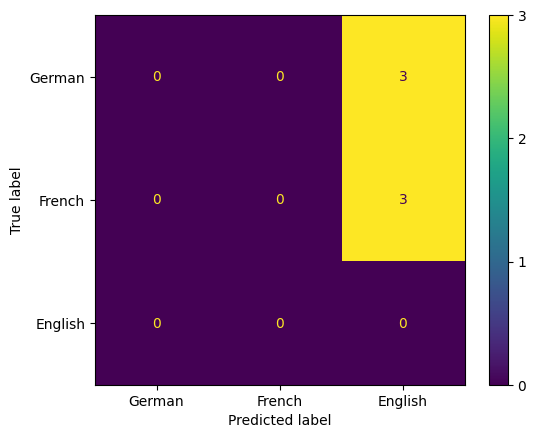

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

print(type(cm))
print(cm)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['German', 'French', 'English']).plot(cmap='viridis', values_format='d')
cm_disp

colorbar = cm_disp.im_.colorbar
colorbar.set_ticks([0, 1, 2, 3])
plt.show()